In [65]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("bright")
sns.set_style("ticks")

In [66]:
models = ['ehr_seft', 'ehr_ipnets', 'ehr_classification_results', 'ehr_transformer', 'odyssey_mamba']
splits = ['split_1', 'split_2', 'split_3', 'split_4', 'split_5']
base_path = '/home/miglgvt/Desktop/deep_learning/project/DL_final'  # Replace with your actual data path
models_2 = ['SEFT', 'IPNets', 'GruD', 'Transformer', 'Odyssey Mamba', 'Custom Mamba']

In [67]:
train_logs = []

for model in models:
    for split in splits:
        train_log_path = os.path.join(base_path, model, split, 'training_log.csv')
        df = pd.read_csv(train_log_path)
        df['model'] = model
        df['split'] = split
        train_logs.append(df)


train_logs_df = pd.concat(train_logs, ignore_index=True)

# Mutate ehr_classification_results to GruD, ehr_transformer to Transformer, ehr_seft to SEFT, ehr_ipnets to IPNets
train_logs_df['model'] = train_logs_df['model'].replace({'ehr_classification_results': 'GruD', 'ehr_transformer': 'Transformer', 'ehr_seft': 'SEFT', 'ehr_ipnets': 'IPNets', 'odyssey_mamba': 'Odyssey Mamba'})


In [68]:
custom_mamba = pd.read_csv('custom_mamba_results_final.csv')
custom_mamba['model'] = 'Custom Mamba'

# Move all the data in train_loss column to val_loss column, and after set all the values in train_loss to 0
custom_mamba['val_loss'] = custom_mamba['train_loss']
custom_mamba['train_loss'] = 0

custom_mamba


,epoch,train_loss,val_loss,val_roc_auc_score,model,split
0,1,0,0.6903,0.6121,Custom Mamba,split_1
1,2,0,0.6338,0.7217,Custom Mamba,split_1
2,3,0,0.5917,0.7689,Custom Mamba,split_1
3,4,0,0.6002,0.7682,Custom Mamba,split_1
4,5,0,0.6142,0.7536,Custom Mamba,split_1
5,6,0,0.5727,0.7729,Custom Mamba,split_1
6,7,0,0.5723,0.7773,Custom Mamba,split_1
7,8,0,0.5853,0.7759,Custom Mamba,split_1
8,9,0,0.5863,0.7757,Custom Mamba,split_1
9,10,0,0.5768,0.7788,Custom Mamba,split_1


In [69]:
train_logs_df = pd.concat([train_logs_df, custom_mamba], ignore_index=True)

train_logs_df

,epoch,train_loss,val_loss,val_roc_auc_score,model,split
0,1,0.768970,0.736599,0.786329,SEFT,split_1
1,2,0.572210,0.470011,0.821609,SEFT,split_1
2,3,0.527898,0.461265,0.829881,SEFT,split_1
3,4,0.497562,0.495860,0.844529,SEFT,split_1
4,5,0.485394,0.576997,0.846841,SEFT,split_1
...,...,...,...,...,...,...
567,9,0.000000,0.586300,0.775700,Custom Mamba,split_1
568,10,0.000000,0.576800,0.778800,Custom Mamba,split_1
569,11,0.000000,0.571300,0.779500,Custom Mamba,split_1
570,12,0.000000,0.571000,0.779800,Custom Mamba,split_1


In [70]:
test_results = []

for model in models:
    for split in splits:
        test_results_path = os.path.join(base_path, model, split, 'test_results.json')
        with open(test_results_path, 'r') as f:
            data = json.load(f)
            # Flatten the JSON structure
            overall_metrics = {
                'model': model,
                'split': split,
                'test_loss': data.get('test_loss'),
                'accuracy': data.get('accuracy'),
                'AUPRC': data.get('AUPRC'),
                'AUROC': data.get('AUROC')
            }
            test_results.append(overall_metrics)

test_results_df = pd.DataFrame(test_results)

# Mutate ehr_classification_results to GruD, ehr_transformer to Transformer, ehr_seft to SEFT, ehr_ipnets to IPNets
test_results_df['model'] = test_results_df['model'].replace({'ehr_classification_results': 'GruD', 'ehr_transformer': 'Transformer', 'ehr_seft': 'SEFT', 'ehr_ipnets': 'IPNets', 'odyssey_mamba': 'Odyssey Mamba'})

models = models_2

In [72]:

# add to test_results_df
new_row = pd.DataFrame([{'model': 'Custom Mamba', 'split': 'split_1', 'test_loss': 0.5455, 'accuracy': 0.6806, 'AUPRC': 0.4024, 'AUROC': 0.8131}])
test_results_df = pd.concat([test_results_df, new_row], ignore_index=True)

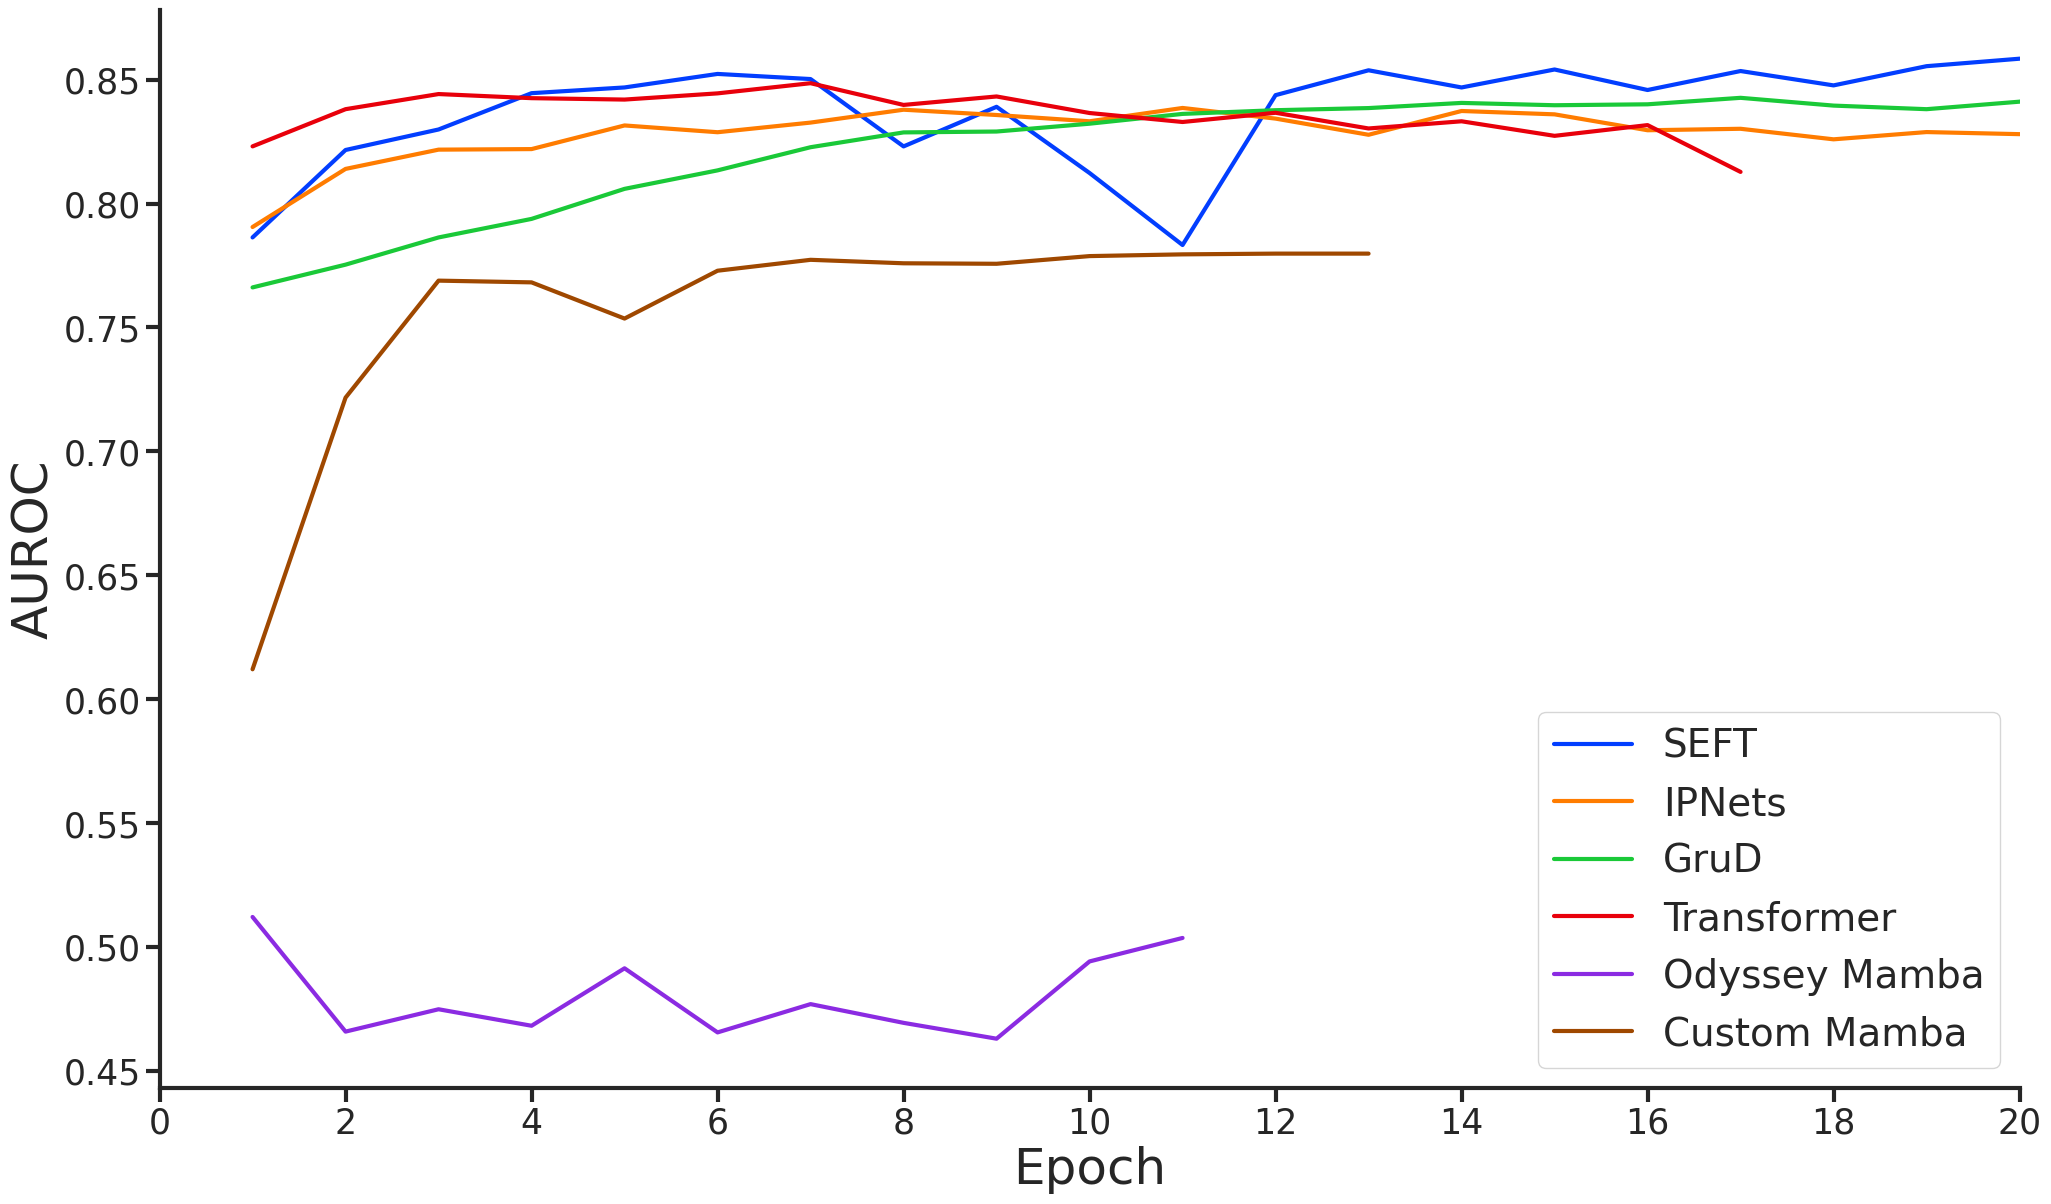

In [128]:
plt.figure(figsize=(24, 14))

for m in models:
    model_data = train_logs_df[(train_logs_df['model'] == m) & (train_logs_df['split'] == 'split_1')]
    sns.lineplot(data=model_data, x='epoch', y='val_roc_auc_score', label=m, linewidth=3)

plt.xlim(0, 20)

plt.xticks(range(0, 21, 2), fontsize=25)


plt.gca().yaxis.set_tick_params(width=3, length=10, labelsize=25)
plt.gca().xaxis.set_tick_params(width=3, length=10, labelsize=25)

sns.despine()
plt.xlabel('Epoch', fontsize=36)
plt.ylabel('AUROC', fontsize=36)
plt.legend(fontsize=28)

plt.gca().spines['left'].set_linewidth(3)
plt.gca().spines['bottom'].set_linewidth(3)

plt.show()


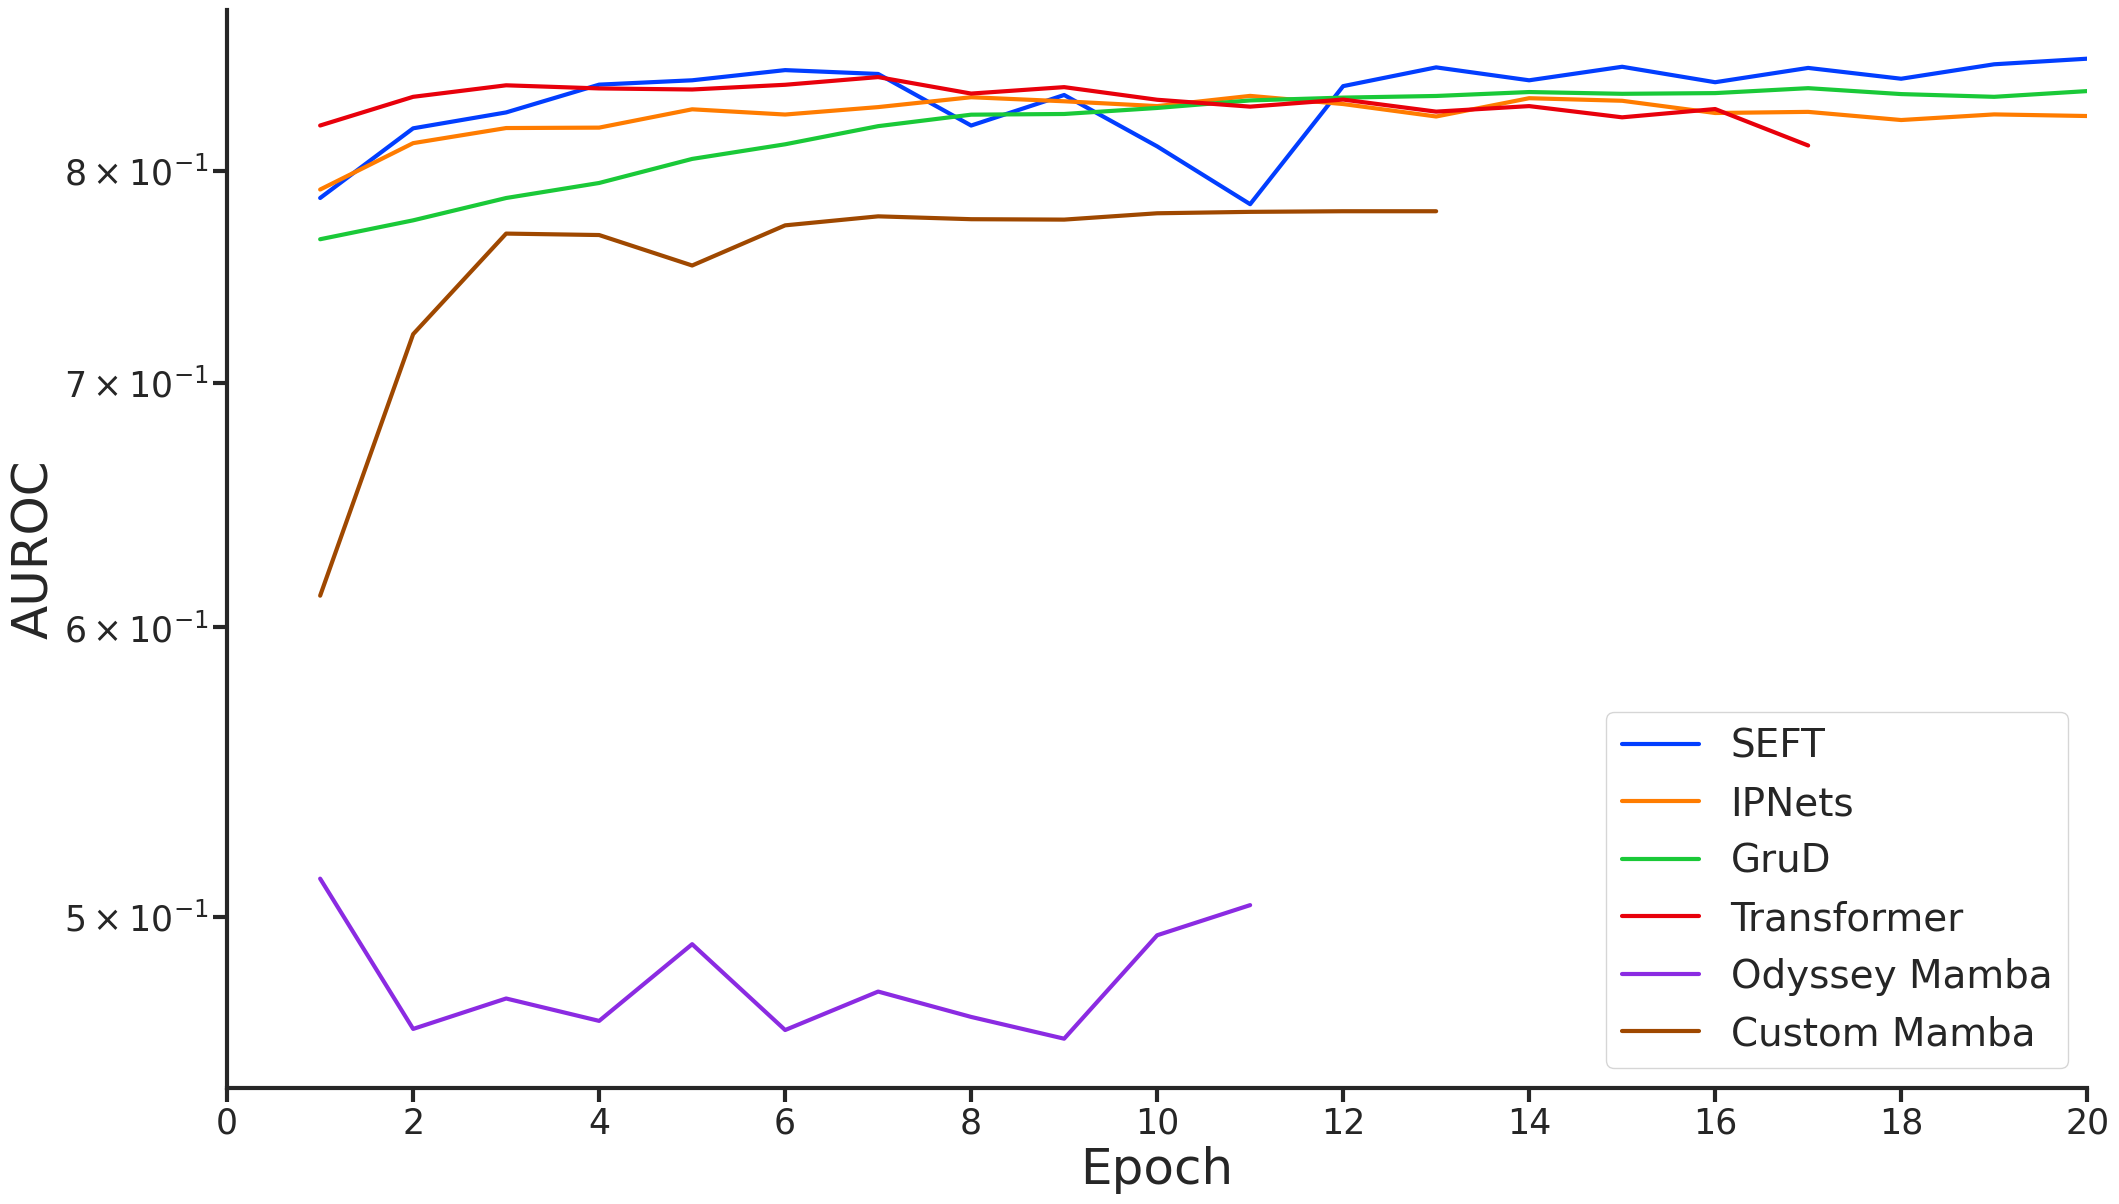

In [147]:
from matplotlib.ticker import LogLocator

plt.figure(figsize=(24, 14))

for m in models:
    model_data = train_logs_df[(train_logs_df['model'] == m) & (train_logs_df['split'] == 'split_1')]
    sns.lineplot(data=model_data, x='epoch', y='val_roc_auc_score', label=m, linewidth=3)

plt.xlim(0, 20)
plt.yscale('log')

log_locator = LogLocator(base=10.0, subs=None, numticks=10)
plt.gca().yaxis.set_major_locator(log_locator)

plt.xticks(range(0, 21, 2))

plt.gca().yaxis.set_tick_params(width=3, length=10, labelsize=25)
plt.gca().xaxis.set_tick_params(width=3, length=10, labelsize=25)

sns.despine()
plt.xlabel('Epoch', fontsize=36)
plt.ylabel('AUROC', fontsize=36)
plt.legend(fontsize=28)

plt.gca().spines['left'].set_linewidth(3)
plt.gca().spines['bottom'].set_linewidth(3)

plt.show()
